<a href="https://colab.research.google.com/github/rifkifakhrudin2004/PCVKSemester5/blob/main/modul05/modul5.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Tugas 1

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [34]:
import numpy as np
import pandas as pd
import cv2 as cv
from google.colab.patches import cv2_imshow
from skimage import io
from skimage import transform
from PIL import Image
import matplotlib.pylab as plt

path = '/content/drive/MyDrive/Images/female.tiff'

 Gamma Correction pada citra 
-------------------------------
Masukkan nilai Gamma: 3


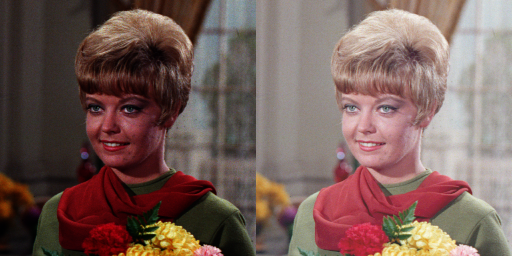

In [ ]:
print(' Gamma Correction pada citra ')
print('-------------------------------')
try:
 gamma = int(input('Masukkan nilai Gamma: '))
except ValueError:
 print('Error, not a number')

ori = cv.imread(path)
gamma_correction = np.zeros(ori.shape, ori.dtype)

for y in range(ori.shape[0]):
  for x in range(ori.shape[1]):
    for c in range(ori.shape[2]):
      gamma_correction[y,x,c] = np.clip(255 * pow  (ori[y,x,c] / 255, (1 / gamma)), 0, 255)

final_frame = cv.hconcat((ori, gamma_correction))
cv2_imshow(final_frame)

Image Depth

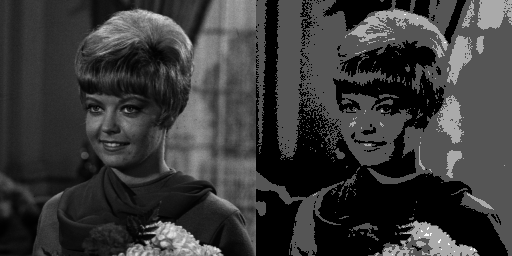

In [ ]:
bit_depth = 2
level = 255 / (pow(2,bit_depth)-1)

original = cv.imread(path, cv.IMREAD_GRAYSCALE)
depth_image = np.zeros(original.shape, original.dtype)

for y in range(original.shape[0]):
  for x in range(original.shape[1]):
     depth_image[y,x] = np.clip(round(original[y,x] / level) * level, 0, 255);

final_frame = cv.hconcat((original, depth_image))
cv2_imshow(final_frame)

Average Denoising

In [ ]:
import glob

origin = cv.imread('/content/drive/MyDrive/Images/galaxy.jpg')

cv_img = []
for img in glob.glob('/content/drive/MyDrive/Images/noises/*.jpg'):
  n= cv.imread(img)
  cv_img.append(n)


In [3]:
def average_denoising(jum):

  img_sum = cv_img[0]
  for i in range(1, jum):
      alpha = 1.0 / (i + 1)
      beta = 1.0 - alpha
      image = cv_img[i]
      if image is not None:
          img_sum = cv.addWeighted(image, alpha, img_sum, beta, 0.0)

  return img_sum

In [4]:
def PSNR(original, compressed):
    mse = np.mean((original - compressed) ** 2)
    if(mse == 0):
      return 100
    max_pixel = 255.0
    psnr = 20 * np.log10(max_pixel / np.sqrt(mse))
    return psnr


Jumlah Citra di Average = 5

Nilai PSNR adalah 27.539090982834587 (dB)


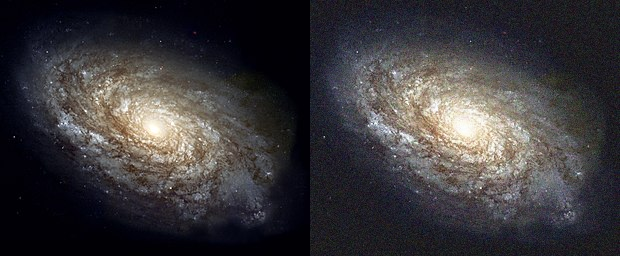

In [ ]:
compressed = average_denoising(5)
psnr = PSNR(origin, compressed)

print('Nilai PSNR adalah',psnr,'(dB)')
galaxy_frame = cv.hconcat((origin, compressed))
cv2_imshow(galaxy_frame)



Jumlah Citra di Average = 10

Nilai PSNR adalah 27.564939090141607 (dB)


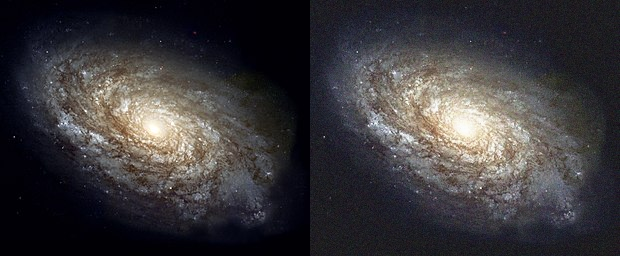

In [ ]:
compressed = average_denoising(10)
psnr = PSNR(origin, compressed)

print('Nilai PSNR adalah',psnr,'(dB)')
galaxy_frame = cv.hconcat((origin, compressed))
cv2_imshow(galaxy_frame)


Jumlah Citra di Average = 20

Nilai PSNR adalah 27.541507379718297 (dB)


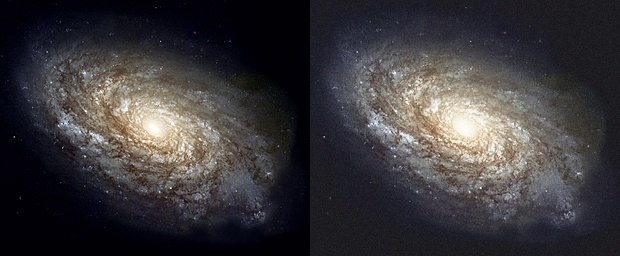

In [ ]:
compressed = average_denoising(20)
psnr = PSNR(origin, compressed)

print('Nilai PSNR adalah',psnr,'(dB)')
galaxy_frame = cv.hconcat((origin, compressed))
cv2_imshow(galaxy_frame)


Jumlah Citra di Average = 40

Nilai PSNR adalah 27.5060674962032 (dB)


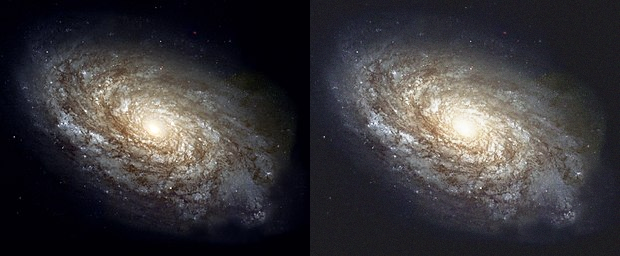

In [ ]:
compressed = average_denoising(40)
psnr = PSNR(origin, compressed)

print('Nilai PSNR adalah',psnr,'(dB)')
galaxy_frame = cv.hconcat((origin, compressed))
cv2_imshow(galaxy_frame)


Jumlah Citra di Average = 80

Nilai PSNR adalah 27.50993596753927 (dB)


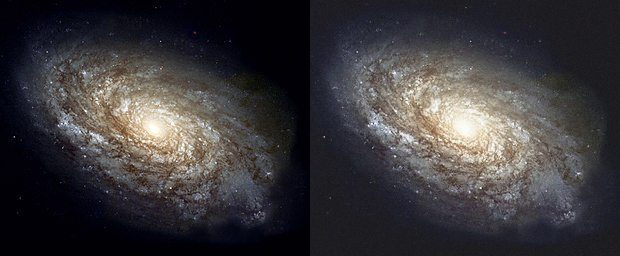

In [ ]:
compressed = average_denoising(80)
psnr = PSNR(origin, compressed)

print('Nilai PSNR adalah',psnr,'(dB)')
galaxy_frame = cv.hconcat((origin, compressed))
cv2_imshow(galaxy_frame)

Jumlah Citra di Average = 100

Nilai PSNR adalah 27.51823927523518 (dB)


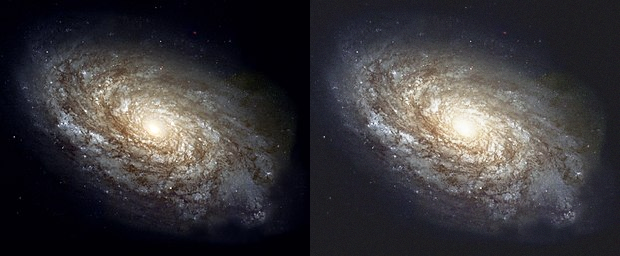

In [ ]:
compressed = average_denoising(100)
psnr = PSNR(origin, compressed)

print('Nilai PSNR adalah',psnr,'(dB)')
galaxy_frame = cv.hconcat((origin, compressed))
cv2_imshow(galaxy_frame)

# # image masking

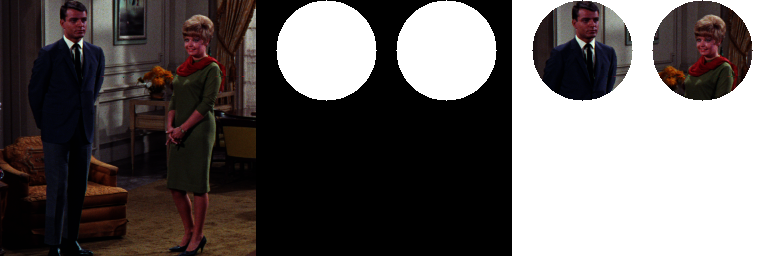

In [37]:
# image masking
img = cv.imread('/content/drive/MyDrive/Images/couple.tiff')
mask = np.zeros(img.shape,dtype=np.uint8)
mask = cv.circle(mask, (70,50), 50, (255,255,255), -1)

mask2 = np.zeros(img.shape, dtype=np.uint8)
mask2 = cv.circle(mask, (190,50), 50, (255,255,255), -1)

result = img & mask & mask2
result[mask==0] = 255

final_frame = cv.hconcat((img,mask,result))
cv2_imshow(final_frame)

OPERATOR(komplemen)

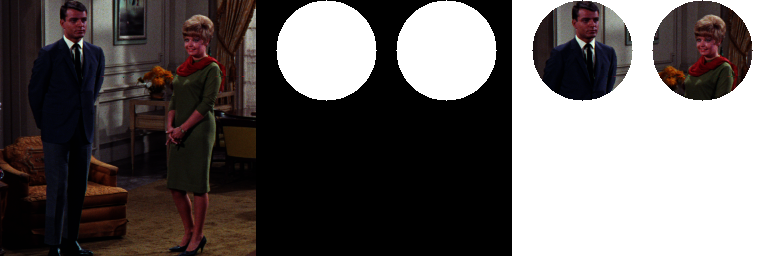

In [39]:
# menggunakan operator and
img = cv.imread('/content/drive/MyDrive/Images/couple.tiff')
mask = np.zeros(img.shape,dtype=np.uint8)
mask = cv.circle(mask, (70,50), 50, (255,255,255), -1)

mask2 = np.zeros(img.shape, dtype=np.uint8)
mask2 = cv.circle(mask, (190,50), 50, (255,255,255), -1)

result = img & mask & mask2
result[mask==0] = 255

final_frame = cv.hconcat((img,mask,result))
cv2_imshow(final_frame)

OR

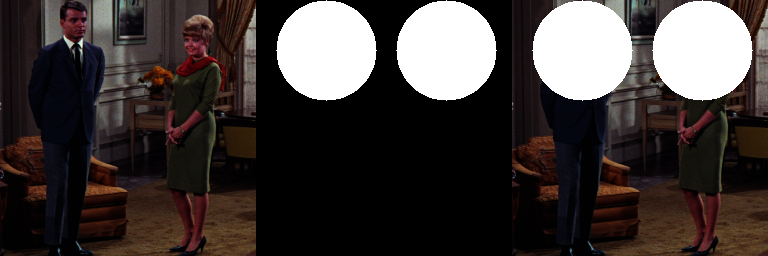

In [40]:
# menggunakan operator or
mask = np.zeros(img.shape,img.dtype)
mask = cv.circle(mask, (70,50), 50, (255,255,255), -1)

result = img & mask

mask2 = np.zeros(img.shape, img.dtype)
mask2 = cv.circle(mask, (190,50), 50, (255,255,255), -1)

result = img & mask2

masked = img | mask

final_frame = cv.hconcat((img,mask,masked))
cv2_imshow(final_frame)

AND

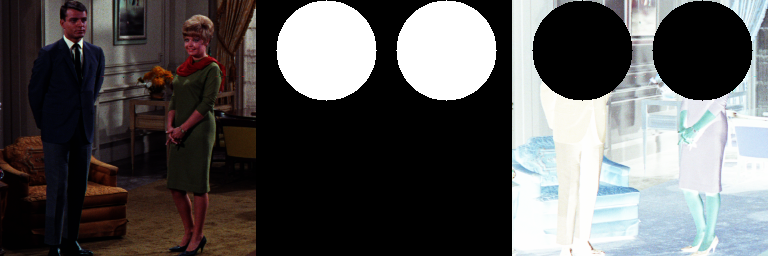

In [41]:
mask = np.zeros(img.shape,dtype=np.uint8)
mask = cv.circle(mask, (70,50), 50, (255,255,255), -1)

result = img & mask

mask2 = np.zeros(img.shape,dtype=np.uint8)
mask2 = cv.circle(mask, (190,50), 50, (255,255,255), -1)

result = img & mask2

masked = ~img & ~mask

final_frame = cv.hconcat((img, mask, masked))
cv2_imshow(final_frame)

NAND

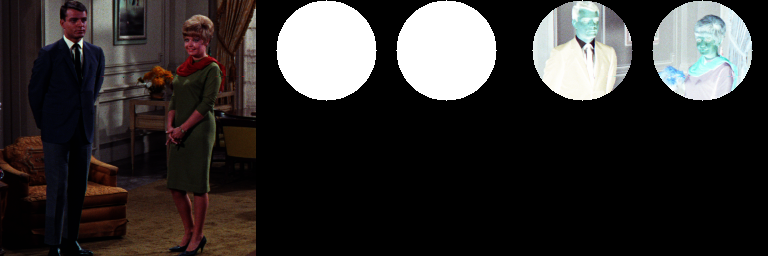

In [42]:
# menggunakan operator nand

mask = np.zeros(img.shape,dtype=np.uint8)
mask = cv.circle(mask, (70,50), 50, (255,255,255), -1)
mask2 = np.zeros(img.shape,dtype=np.uint8)
mask2 = cv.circle(mask, (190,50), 50, (255,255,255), -1)

masked = ~img & mask

final_frame = cv.hconcat((img, mask, masked))
cv2_imshow(final_frame)


XOR

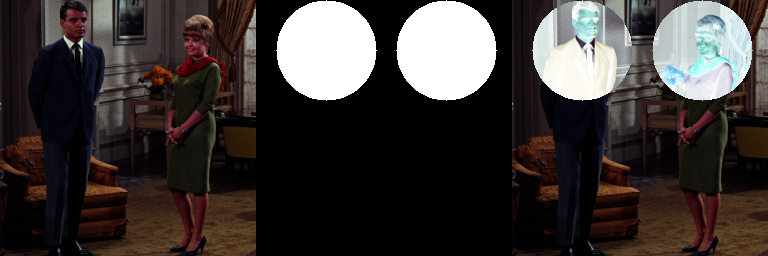

In [43]:
# menggunakan operator xor
mask = np.zeros(img.shape,dtype=np.uint8)
mask = cv.circle(mask, (70,50), 50, (255,255,255), -1)
mask2 = np.zeros(img.shape,dtype=np.uint8)
mask2 = cv.circle(mask, (190,50), 50, (255,255,255), -1)

masked = cv.bitwise_xor(img, mask)

final_frame = cv.hconcat((img, mask, masked))
cv2_imshow(final_frame)

XOR